ex1.

+ flexible model would be better because sample size is large enough to fit more parameters and small number of predictors limits model variance.
+ flexible learning model would perform worse because it would be more likely to overfit.
+ flexible learning model would perform better because it is less restrictive on the shape of fit.
+ flexible learning model would perform worse because it would be more likely to overfit.

ex2.

1. regression inference
2. classifier predict
3. regression inference

ex3.

+ red = test error
+ black = estimator variance
+ green = model bias
+ gray = irreducible error
+ blue = train error

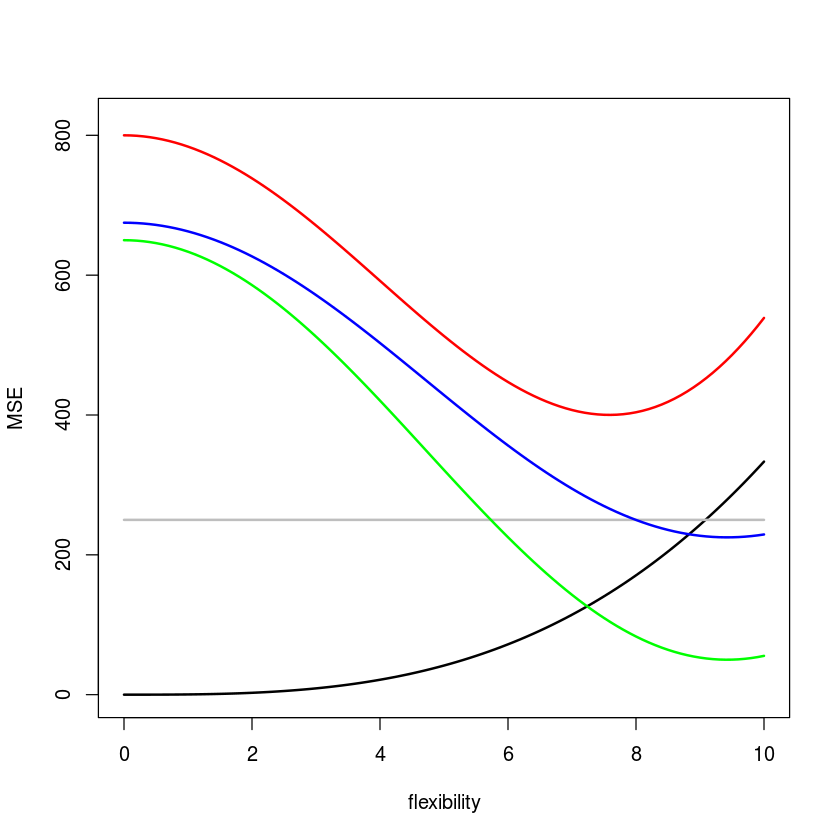

In [1]:
curve(82*x, from=0, to=10, xlab="flexibility", ylab="MSE", col="white")  
curve(300*cos(x/3)+500+x^3/3, add=TRUE, col="red", lwd=2)  # test error
curve(x^3/3, add=TRUE, col="black", lwd=2)                # variance
curve(0*x+250, add=TRUE, col="gray", lwd=2)                # irreducible error
curve(300*cos(x/3)+350, add=TRUE, col="green", lwd=2)      # bias
curve(225*cos(x/3)+450, add=TRUE, col="blue", lwd=2)       # train error

5.

Advantages of a very flexible model include better fit to data and **fewer assumptions**. Disadvantages are hard to interpret and prone to overfitting.

A more flexible approach might be prefered is underlying data is very comples (simple linear fit doesn't suffice) or if we mainly care about the result and not inference. A less flexible model is prefered is the underlying data has a simple shape or if inference is important.

6.

参数模型，我们对数据（分布形状）进行假设，可以使用先验的知识，并且待优化的参数不多。缺点，就是先验假设可能是错误的。

非参数模型，则没有对数据分布进行假设，这样就可以更好的对样本数据进行拟合。缺点，需要更多的样本。

7.

K值小一点，使得KNN能够更好的学到非线性边界的知识。

8.

In [2]:
require(ISLR)
data(College)
str(College)

Loading required package: ISLR


'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [3]:
summary(College)


 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

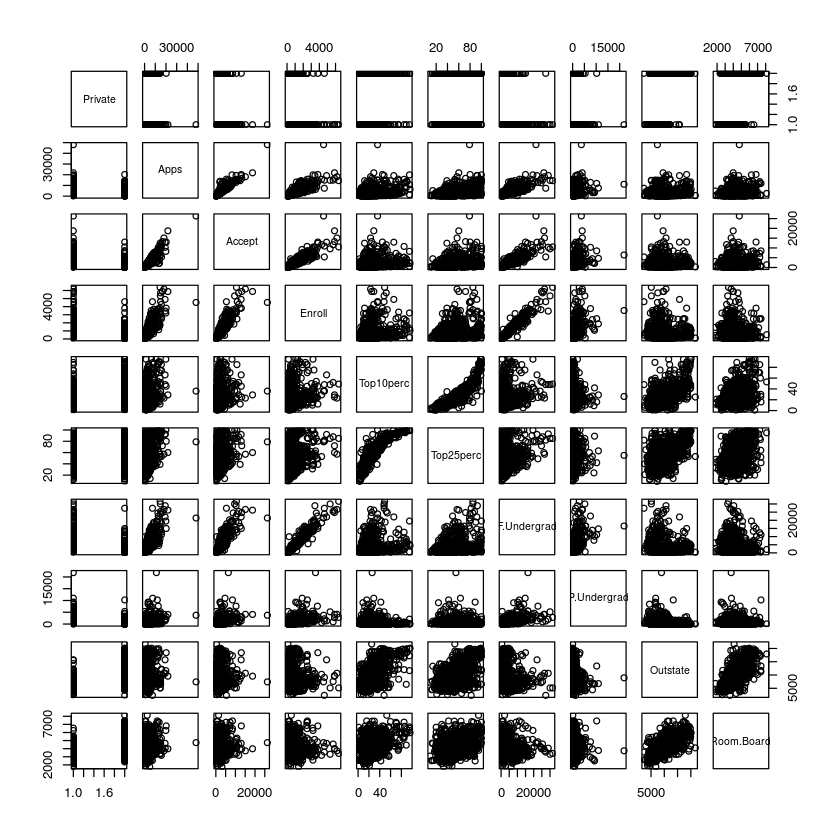

In [5]:
pairs(College[, 1:10])

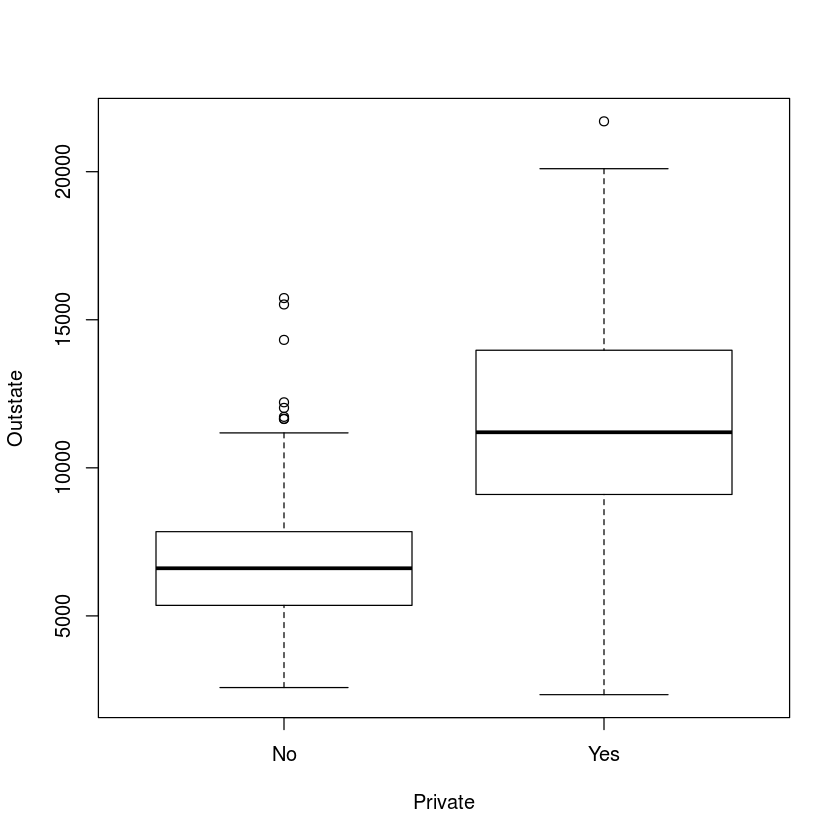

In [9]:
boxplot(Outstate~Private, data=College, xlab="Private", ylab="Outstate")

In [10]:
Elite <- rep("No", nrow(College))
Elite[College$Top10perc>50] <- "Yes"
College <- data.frame(College, Elite)
summary(College)  # 78 Elite

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

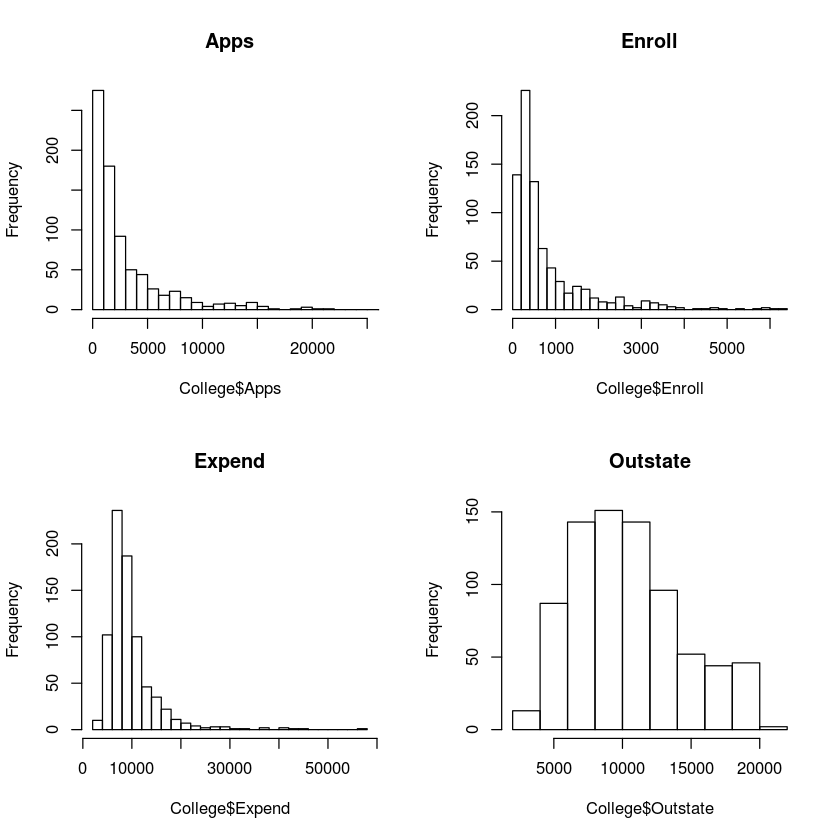

In [12]:
par(mfrow=c(2,2))
hist(College$Apps,breaks=50,xlim = c(0,25000),main = "Apps")
hist(College$Enroll, breaks=25, main="Enroll")
hist(College$Expend, breaks=25, main="Expend")
hist(College$Outstate, main="Outstate")

9.

In [15]:
require(ISLR)
data(Auto)
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


In [16]:
# 看定量预测变量的取值范围
range(Auto$mpg)

[1]  9.0 46.6

In [18]:
tmp=Auto[,-c(8,9)]
tmp=tmp[-c(10,85)]

sapply(tmp,range)

mpg,cylinders,displacement,horsepower,weight,acceleration,year
9.0,3,68,46,1613,8.0,70
46.6,8,455,230,5140,24.8,82


In [19]:
sapply(tmp,mean)

mpg    cylinders displacement   horsepower       weight acceleration 
   23.445918     5.471939   194.411990   104.469388  2977.584184    15.541327 
        year 
   75.979592

In [21]:
sapply(tmp,sd)

mpg    cylinders displacement   horsepower       weight acceleration 
    7.805007     1.705783   104.644004    38.491160   849.402560     2.758864 
        year 
    3.683737

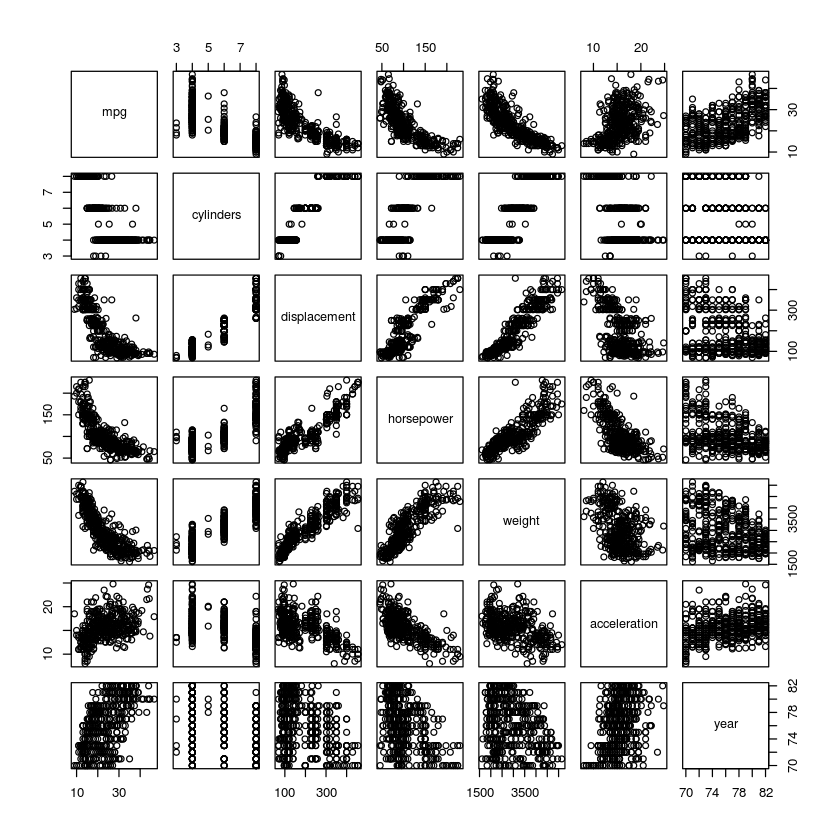

In [22]:
pairs(Auto[,1:7])

10.

In [23]:
require(MASS)
require(MASS)
data(Boston)

Loading required package: MASS


In [24]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


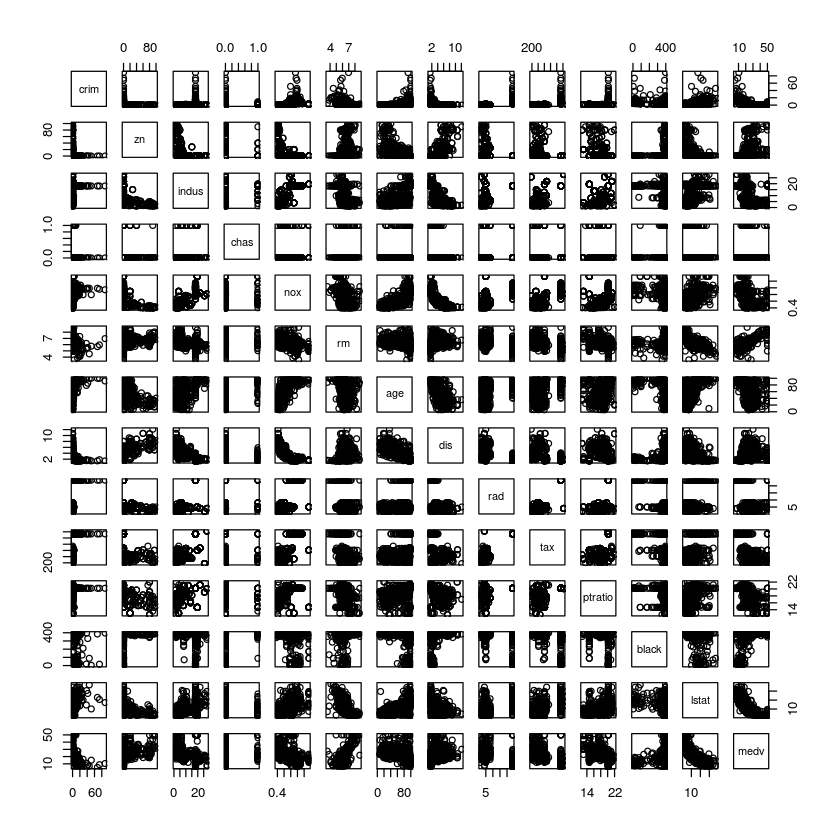

In [25]:
pairs(Boston)

Loading required package: ggplot2
Loading required package: reshape2


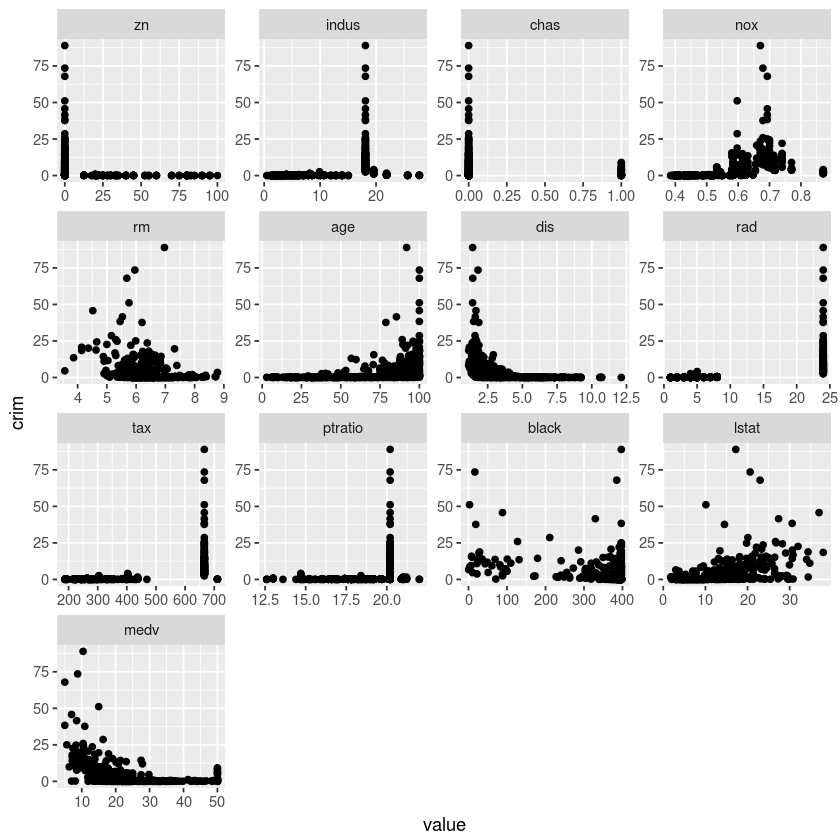

In [26]:
require(ggplot2)
require(reshape2)

# plot each feature against crim rate
bosmelt <- melt(Boston, id="crim")
ggplot(bosmelt, aes(x=value, y=crim)) +
  facet_wrap(~variable, scales="free") + 
  geom_point()

In [27]:
 datax <- array(1:8, dim=c(2,2,2)) 
melt(datax) 

Var1,Var2,Var3,value
1,1,1,1
2,1,1,2
1,2,1,3
2,2,1,4
1,1,2,5
2,1,2,6
1,2,2,7
2,2,2,8


In [28]:
(corrmatrix <- cor(Boston, use="complete.obs")[1,])

crim          zn       indus        chas         nox          rm 
 1.00000000 -0.20046922  0.40658341 -0.05589158  0.42097171 -0.21924670 
        age         dis         rad         tax     ptratio       black 
 0.35273425 -0.37967009  0.62550515  0.58276431  0.28994558 -0.38506394 
      lstat        medv 
 0.45562148 -0.38830461

In [32]:
corrmatrix[corrmatrix > 0.5 | corrmatrix < -0.5][-1]

rad       tax 
0.6255051 0.5827643

d)

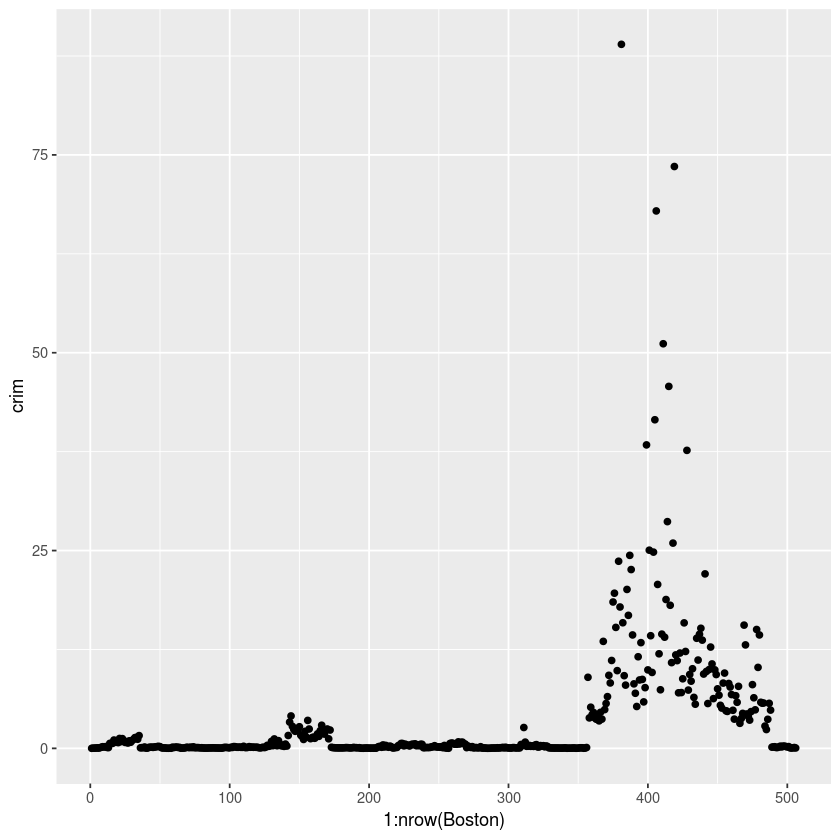

In [33]:
g <- ggplot(Boston, aes(x=1:nrow(Boston), y=crim))
g + geom_point()

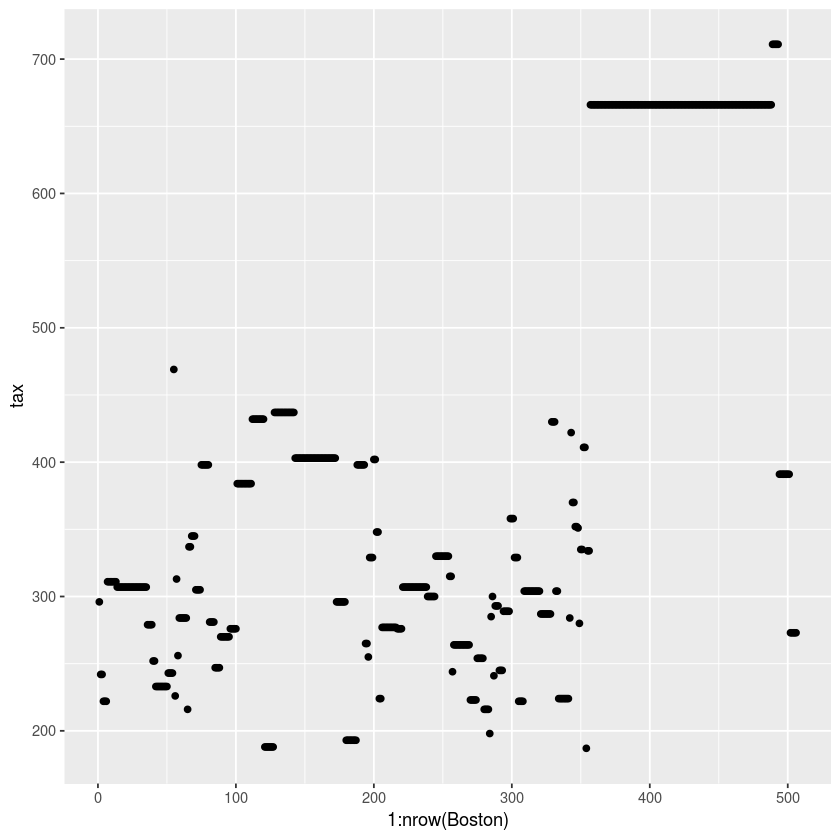

In [34]:
g <- ggplot(Boston, aes(x=1:nrow(Boston), y=tax))
g + geom_point()

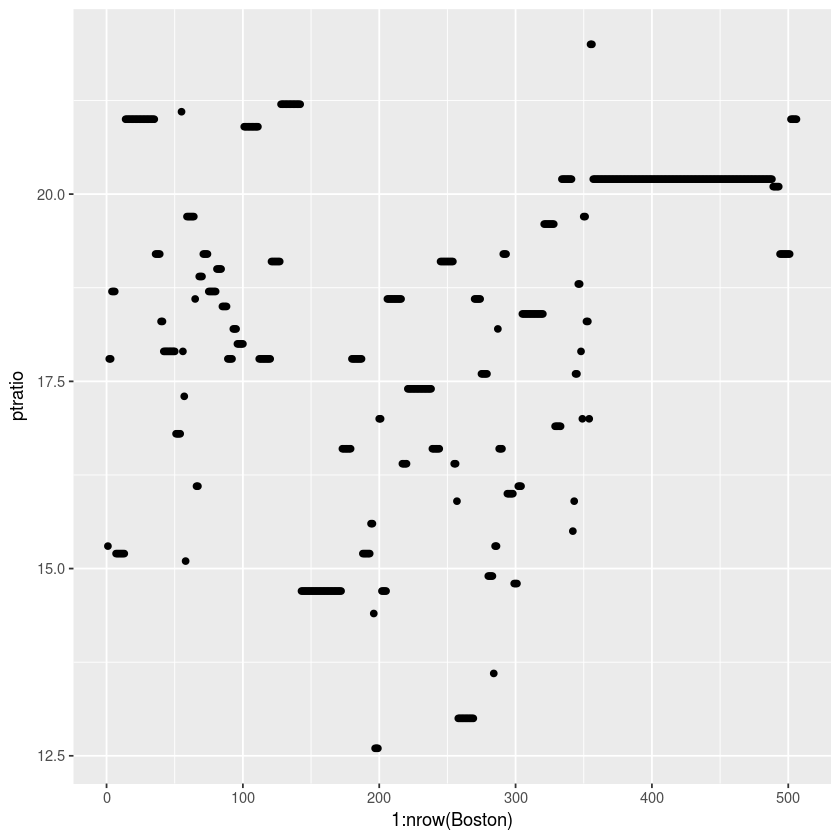

In [35]:
g <- ggplot(Boston, aes(x=1:nrow(Boston), y=ptratio))
g + geom_point()

In [36]:
# e
table(Boston$chas)  


  0   1 
471  35 

In [38]:
# f
median(Boston$ptratio)

[1] 19.05

In [39]:
# there are two towns with lowest medv value of 5
(seltown <- Boston[Boston$medv == min(Boston$medv),])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


In [40]:
# overall quartiles and range of predictors
sapply(Boston, quantile)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0%,0.006320,0.0,0.46,0,0.385,3.5610,2.900,1.129600,1,187,12.60,0.3200,1.730,5.000
25%,0.082045,0.0,5.19,0,0.449,5.8855,45.025,2.100175,4,279,17.40,375.3775,6.950,17.025
50%,0.256510,0.0,9.69,0,0.538,6.2085,77.500,3.207450,5,330,19.05,391.4400,11.360,21.200
75%,3.677083,12.5,18.10,0,0.624,6.6235,94.075,5.188425,24,666,20.20,396.2250,16.955,25.000
100%,88.976200,100.0,27.74,1,0.871,8.7800,100.000,12.126500,24,711,22.00,396.9000,37.970,50.000


In [41]:
# h
# count of towns
nrow(Boston[Boston$rm > 7,])  # 64 with > 7 rooms

[1] 64

In [42]:
# count of towns
nrow(Boston[Boston$rm > 8,])

[1] 13

In [43]:
# row 1: mean for towns with > 8 rooms per dwelling
# row 2: median for all towns
rbind(sapply(Boston[Boston$rm > 8,], mean), sapply(Boston, median))

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.7187954,13.61538,7.078462,0.1538462,0.5392385,8.348538,71.53846,3.430192,7.461538,325.0769,16.36154,385.2108,4.31,44.2
0.2565100,0.00000,9.690000,0.0000000,0.5380000,6.208500,77.50000,3.207450,5.000000,330.0000,19.05000,391.4400,11.36,21.2
